In [7]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
DESCRIPTION

Figure S1

"""

# Import modules
import numpy as np
import netCDF4
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Define filepath 
path = '/Users/jryan4/Dropbox (University of Oregon)/research/clouds/data/'

savepath = '/Users/jryan4/Dropbox (University of Oregon)/research/clouds/revised-manuscript/supp_figures/'

In [5]:
# Import data
mod = netCDF4.Dataset(path + 'final_climatologies.nc')

# Define maximum snowline
snowline_file = netCDF4.Dataset(path + 'sci-adv-products/Monthly_Bare_Ice_2012.nc')
snowline = snowline_file.variables['bare_ice'][1, :, :].filled(np.nan)
max_snowline = (snowline > 0.1)

In [4]:
def scale_bar(ax, length=None, location=(0.5, 0.05), linewidth=3):
    """
    ax is the axes to draw the scalebar on.
    length is the length of the scalebar in km.
    location is center of the scalebar in axis coordinates.
    (ie. 0.5 is the middle of the plot)
    linewidth is the thickness of the scalebar.
    """
    #Get the limits of the axis in lat long
    llx0, llx1, lly0, lly1 = ax.get_extent(ccrs.PlateCarree())
    #Make tmc horizontally centred on the middle of the map,
    #vertically at scale bar location
    sbllx = (llx1 + llx0) / 2
    sblly = lly0 + (lly1 - lly0) * location[1]
    tmc = ccrs.TransverseMercator(sbllx, sblly)
    #Get the extent of the plotted area in coordinates in metres
    x0, x1, y0, y1 = ax.get_extent(tmc)
    #Turn the specified scalebar location into coordinates in metres
    sbx = x0 + (x1 - x0) * location[0]
    sby = y0 + (y1 - y0) * location[1]

    #Calculate a scale bar length if none has been given
    #(Theres probably a more pythonic way of rounding the number but this works)
    if not length: 
        length = (x1 - x0) / 5000 #in km
        ndim = int(np.floor(np.log10(length))) #number of digits in number
        length = round(length, -ndim) #round to 1sf
        #Returns numbers starting with the list
        def scale_number(x):
            if str(x)[0] in ['1', '2', '5']: return int(x)        
            else: return scale_number(x - 10 ** ndim)
        length = scale_number(length) 

    #Generate the x coordinate for the ends of the scalebar
    bar_xs = [sbx - length * 500, sbx + length * 500]
    #Plot the scalebar
    ax.plot(bar_xs, [sby, sby], transform=tmc, color='k', linewidth=linewidth)
    #Plot the scalebar label
    ax.text(sbx, sby, str(length) + ' km', transform=tmc,
            horizontalalignment='center', verticalalignment='bottom')

/var/folders/xj/5ps5mr8d5ysbd2mxxqjg3k800000gq/T/ipykernel_51630/2001840833.py:13: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_edgecolor('white')


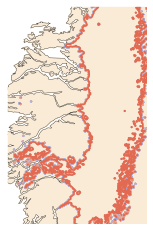

In [8]:
###############################################################################
# Supp Figure 1i. Zoomed map showing mean CRE NET in SW Greenland
###############################################################################
lons = mod.variables['longitude'][:]
lats = mod.variables['latitude'][:]

fig = plt.figure(figsize=(4, 4))
ax = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=-45))
ax.set_extent([-53, -47, 65, 69], crs=ccrs.PlateCarree()) # (x0, x1, y0, y1)
plt.contour(lons, lats, max_snowline, transform=ccrs.PlateCarree(), cmap='coolwarm')
ax.coastlines(resolution='10m', color='black', linewidth=0.3)
ax.add_feature(cfeature.LAND, facecolor='antiquewhite')
ax.outline_patch.set_edgecolor('white')

#scale_bar(ax, length=50, location=(0.5, 0.05), linewidth=3)
#plt.tight_layout()
plt.savefig(savepath + 'fig_sxa_snowline.png', dpi=200)

/var/folders/xj/5ps5mr8d5ysbd2mxxqjg3k800000gq/T/ipykernel_51630/25255051.py:13: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_edgecolor('white')


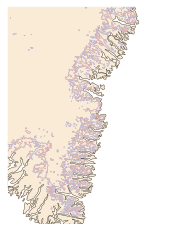

In [19]:
###############################################################################
# Supp Figure 1i. Zoomed map showing mean CRE NET in SW Greenland
###############################################################################
lons = mod.variables['longitude'][:]
lats = mod.variables['latitude'][:]

fig = plt.figure(figsize=(4, 4))
ax = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=-45))
ax.set_extent([-46, -40, 60, 64], crs=ccrs.PlateCarree()) # (x0, x1, y0, y1)
plt.contour(lons, lats, max_snowline, transform=ccrs.PlateCarree(), linewidths = 0.1, cmap='coolwarm')
ax.coastlines(resolution='10m', color='black', linewidth=0.3)
ax.add_feature(cfeature.LAND, facecolor='antiquewhite')
ax.outline_patch.set_edgecolor('white')

#scale_bar(ax, length=50, location=(0.5, 0.05), linewidth=3)
#plt.tight_layout()
plt.savefig(savepath + 'fig_sxb_snowline.png', dpi=200)

/var/folders/xj/5ps5mr8d5ysbd2mxxqjg3k800000gq/T/ipykernel_51630/356605395.py:6: RuntimeWarning: Mean of empty slice
  mod_cre = np.nanmean(mod.variables['cre'][:], axis=2)
/var/folders/xj/5ps5mr8d5ysbd2mxxqjg3k800000gq/T/ipykernel_51630/356605395.py:16: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_edgecolor('white')


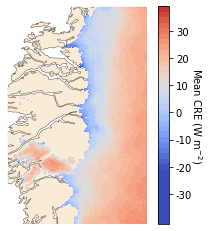

In [16]:
###############################################################################
# Supp Figure 1a. Zoomed map showing mean CRE NET in SW Greenland
###############################################################################
lons = mod.variables['longitude'][:]
lats = mod.variables['latitude'][:]
mod_cre = np.nanmean(mod.variables['cre'][:], axis=2)

fig = plt.figure(figsize=(4, 4))
v = np.arange(-41, 41, 2)
ax = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=-45))
ax.set_extent([-53, -47, 65, 69], crs=ccrs.PlateCarree()) # (x0, x1, y0, y1)
plt.contourf(lons, lats, mod_cre, v, transform=ccrs.PlateCarree(), vmin=-21, vmax=41,
             cmap='coolwarm')
ax.coastlines(resolution='10m', color='black', linewidth=0.3)
ax.add_feature(cfeature.LAND, facecolor='antiquewhite')
ax.outline_patch.set_edgecolor('white')
cbar = plt.colorbar(ticks=[-30, -20, -10, 0, 10, 20, 30])
cbar.ax.set_yticklabels([-30, -20, -10, 0, 10, 20, 30])
cbar.set_label('Mean CRE (W m$^{-2}$)', rotation=270, labelpad=12)
#scale_bar(ax, length=50, location=(0.5, 0.05), linewidth=3)
#plt.tight_layout()
plt.savefig(savepath + 'fig_sxa_mean_cre_sw_greenland.png', dpi=200)

/var/folders/xj/5ps5mr8d5ysbd2mxxqjg3k800000gq/T/ipykernel_51630/1306311065.py:13: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_edgecolor('white')


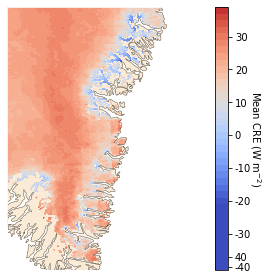

In [17]:
###############################################################################
# Supp Figure 1b. Zoomed map showing mean CRE NET in SE Greenland
###############################################################################

fig = plt.figure(figsize=(4, 4))
v = np.arange(-41, 41, 2)
ax = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=-45))
ax.set_extent([-46, -40, 60, 64], crs=ccrs.PlateCarree()) # (x0, x1, y0, y1)
plt.contourf(lons, lats, mod_cre, v, transform=ccrs.PlateCarree(), vmin=-21, vmax=41,
             cmap='coolwarm')
ax.coastlines(resolution='10m', color='black', linewidth=0.3)
ax.add_feature(cfeature.LAND, facecolor='antiquewhite')
ax.outline_patch.set_edgecolor('white')
cbar = plt.colorbar(ticks=[-40, -30, -20, -10, 0, 10, 20, 30, 40])
cbar.ax.set_yticklabels([-40, -30, -20, -10, 0, 10, 20, 30, 40]) 
cbar.set_label('Mean CRE (W m$^{-2}$)', rotation=270, labelpad=12)
#scale_bar(ax, length=50, location=(0.15, 0.05), linewidth=3)
plt.tight_layout()
plt.savefig(savepath + 'fig_sxb_mean_cre_se_greenland.png', dpi=200)